malaria:-
Malaria is a life-threatening disease. It’s typically transmitted through the bite of an infected Anopheles mosquito. Infected mosquitoes carry the Plasmodium parasite. When this mosquito bites you, the parasite is released into your bloodstream.

Once the parasites are inside your body, they travel to the liver, where they mature. After several days, the mature parasites enter the bloodstream and begin to infect red blood cells.

Within 48 to 72 hours, the parasites inside the red blood cells multiply, causing the infected cells to burst open.

The parasites continue to infect red blood cells, resulting in symptoms that occur in cycles that last two to three days at a time.

Malaria is typically found in tropical and subtropical climates where the parasites can live. The World Health Organization (WHO)Trusted Source states that, in 2016, there were an estimated 216 million cases of malaria in 91 countries.

In the United States, the Centers for Disease Control and Prevention (CDC) report 1,700 casesTrusted Source of malaria annually. Most cases of malaria develop in people who travel to countries where malaria is more common.

What causes malaria?
Malaria can occur if a mosquito infected with the Plasmodium parasite bites you. There are four kinds of malaria parasites that can infect humans: Plasmodium vivax, P. ovale, P. malariae, and P. falciparum.

P. falciparum causes a more severe form of the disease and those who contract this form of malaria have a higher risk of death. An infected mother can also pass the disease to her baby at birth. This is known as congenital malaria.

Malaria is transmitted by blood, so it can also be transmitted through an organ transplant, a transfusion, and use of shared needles or syringes.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from keras import applications

In [2]:
path='../input/cell-images-for-detecting-malaria/cell_images/cell_images/'

In [3]:
labels = ['Parasitized','Uninfected']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                 # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
data = get_data("/kaggle/input/cell-images-for-detecting-malaria/cell_images")

OpenCV(4.4.0) /tmp/pip-req-build-njn2fp78/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-njn2fp78/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



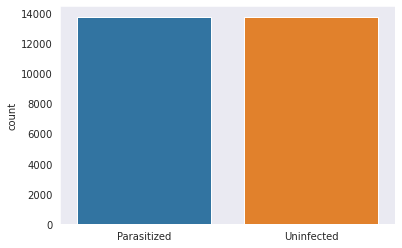

In [5]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

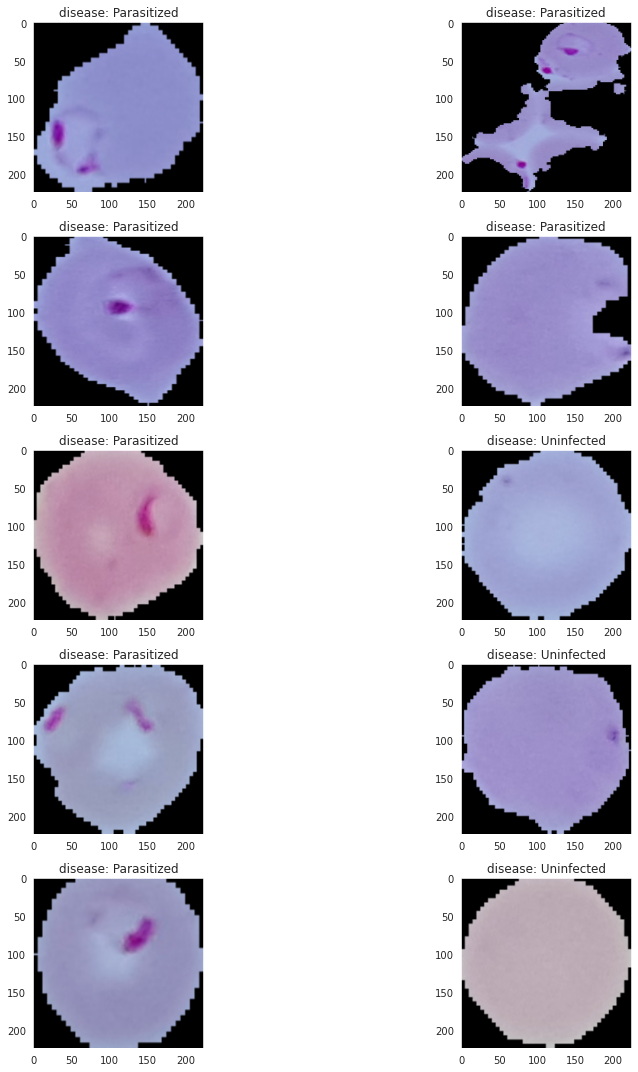

In [6]:
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('disease: '+labels[data[l][1]])
plt.tight_layout()

In [7]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory(path,
                                                     target_size=(64,64),
                                                     batch_size=128,
                                                     class_mode = 'binary',
                                                     subset = 'training')

validation_data = datagen.flow_from_directory(path,
                                                     target_size=(64,64),
                                                     batch_size=128,
                                                     class_mode = 'binary',
                                                     subset = 'validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(64,64,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
history = model.fit_generator(train_data,
            validation_data = validation_data,
            
            epochs = 20,
            verbose = 1)

SyntaxError: positional argument follows keyword argument (<ipython-input-13-acef28b7493b>, line 5)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()